In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

X_data = bostonDF.iloc[:,:-1]
y_target = bostonDF.iloc[:,-1]

###Ridge model

In [2]:
alphas = [0, .1, 1., 10., 50., 80., 100.]

for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print("alpha : %d, RMSE : %.3f"%(alpha, avg_rmse))

alpha : 0, RMSE : 5.080
alpha : 0, RMSE : 5.063
alpha : 1, RMSE : 4.982
alpha : 10, RMSE : 4.821
alpha : 50, RMSE : 4.707
alpha : 80, RMSE : 4.702
alpha : 100, RMSE : 4.709


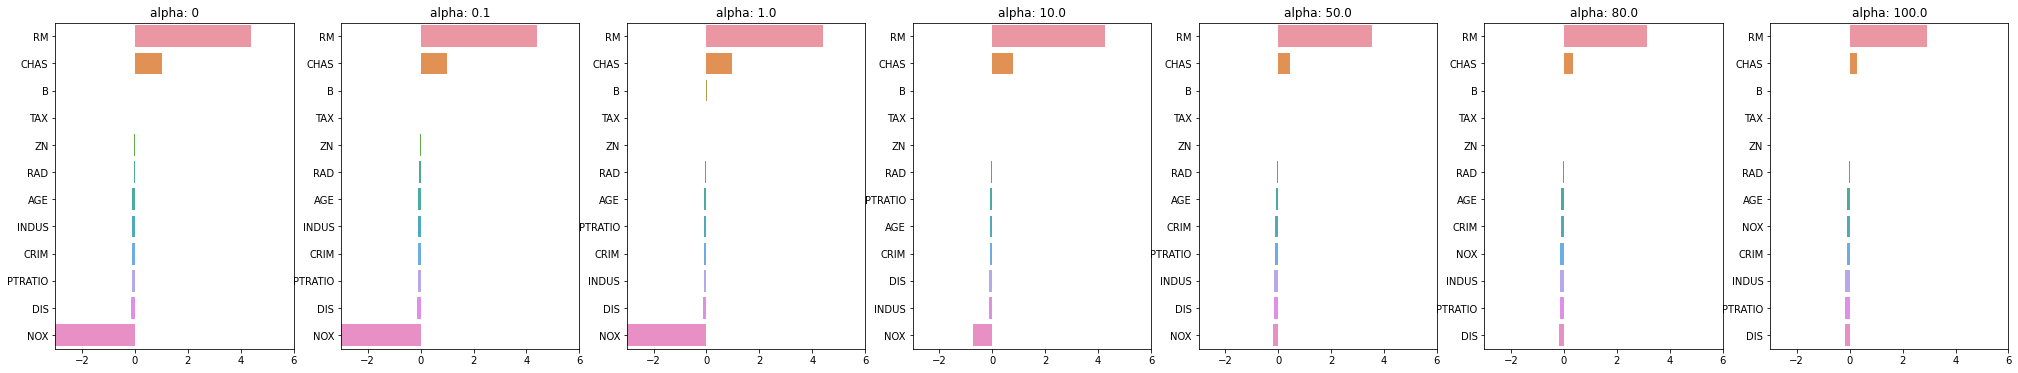

In [3]:
alphaLen = len(alphas)
fig, axes = plt.subplots(nrows=1, ncols=alphaLen, figsize=(alphaLen * 5, 6))
coeff_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  coeff = pd.Series(data=-ridge.coef_, index=X_data.columns)
  colname = "alpha: "+str(alpha)
  coeff_df[colname] = coeff
  coeff = coeff.sort_values(ascending=False)
  axes[i].set_title(colname)
  axes[i].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axes[i])
plt.show()

###Lasso model

In [4]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data=None, y_target=None, verbose=True, return_coeff=True):
  coeff_df = pd.DataFrame()
  if verbose :
    print("#######", model_name, "#######")
  for param in params:
    if model_name == 'Ridge':
      model = Ridge(alpha=param)
    elif model_name == 'Lasso':
      model = Lasso(alpha=param)
    elif model_name == 'ElasticNet':
      model = ElasticNet(alpha=param, l1_ratio=0.7)

    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha %f, RMSE : %.3f'%(param, avg_rmse))

    model.fit(X_data, y_target)
    if return_coeff:
      coeff = pd.Series(data=model.coef_, index=X_data.columns)
      colname = 'alpha:'+str(param)
      coeff_df[colname] = coeff
  return coeff_df

In [5]:
lasso_alphas = [0.07, 0.1, 0.5, 1., 3.]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data = X_data, y_target = y_target)

####### Lasso #######
alpha 0.070000, RMSE : 4.788
alpha 0.100000, RMSE : 4.732
alpha 0.500000, RMSE : 4.584
alpha 1.000000, RMSE : 4.714
alpha 3.000000, RMSE : 5.321


In [6]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.0,alpha:3.0
INDUS,0.102186,0.099878,0.095624,0.110229,0.071411
CRIM,0.099498,0.099730,0.102571,0.100218,0.071489
AGE,0.091945,0.091296,0.088193,0.087488,0.088092
PTRATIO,0.072858,0.072091,0.025516,0.000000,0.000000
RAD,0.039803,0.034673,0.000000,-0.000000,-0.000000
DIS,0.039759,0.021953,0.000000,0.000000,0.000000
ZN,0.012832,0.012490,0.002092,-0.002992,-0.018886
TAX,0.000450,0.000759,0.003516,0.004569,0.008377
CHAS,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
NOX,0.000000,0.000000,0.000000,0.000000,0.000000


###ElasticNet model

In [7]:
elastic_alphas = [0.07, 0.1, 0.5, 1., 3.]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data=X_data, y_target=y_target)

####### ElasticNet #######
alpha 0.070000, RMSE : 4.760
alpha 0.100000, RMSE : 4.721
alpha 0.500000, RMSE : 4.627
alpha 1.000000, RMSE : 4.795
alpha 3.000000, RMSE : 5.310


In [8]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.0,alpha:3.0
INDUS,0.112965,0.113035,0.127724,0.143703,0.115473
CRIM,0.101709,0.103324,0.109627,0.109281,0.089820
AGE,0.092592,0.092069,0.087363,0.086311,0.085585
PTRATIO,0.085981,0.094014,0.117464,0.093557,0.000000
DIS,0.069377,0.065032,0.000000,0.000000,0.000000
RAD,0.037874,0.030205,-0.000000,-0.000000,-0.000000
ZN,0.011620,0.010781,0.002535,-0.002517,-0.017488
TAX,0.000411,0.000817,0.002771,0.003598,0.006907
NOX,0.000000,0.000000,0.000000,0.000000,0.000000
B,-0.008664,-0.008694,-0.008563,-0.008404,-0.008390


###Data preprocessing. Standard, MinMax, Log transform

In [9]:
# Standard normalize mean = 0, and variance = 1
# MinMax transforms data into minValue = 0 and maxValue = 1
# log makes data mormalized

import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
def get_scaled_data(method="None", p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data
  
  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
  return scaled_data

In [10]:
alphas = [0.1, 1, 10, 100]

scale_methods = [
  (None, None),
  ('Standard', None),
  ('Standard', 2),
  ('MinMax', None),
  ('MinMax', 2),
  ('Log', None),
]

for target in scale_methods:
  X_data_scaled = get_scaled_data(method=target[0], p_degree=target[1], input_data=X_data)
  print("%s ,  %s"%(target[0], str(target[1])))
  get_linear_reg_eval('Ridge', params=alphas, X_data=X_data_scaled, y_target = y_target, verbose=False, return_coeff=False)

None ,  None
alpha 0.100000, RMSE : 5.063
alpha 1.000000, RMSE : 4.982
alpha 10.000000, RMSE : 4.821
alpha 100.000000, RMSE : 4.709
Standard ,  None
alpha 0.100000, RMSE : 5.079
alpha 1.000000, RMSE : 5.068
alpha 10.000000, RMSE : 4.974
alpha 100.000000, RMSE : 4.659
Standard ,  2
alpha 0.100000, RMSE : 11.520
alpha 1.000000, RMSE : 7.855
alpha 10.000000, RMSE : 5.523
alpha 100.000000, RMSE : 4.956
MinMax ,  None
alpha 0.100000, RMSE : 5.044
alpha 1.000000, RMSE : 4.868
alpha 10.000000, RMSE : 4.858
alpha 100.000000, RMSE : 5.645
MinMax ,  2
alpha 0.100000, RMSE : 5.641
alpha 1.000000, RMSE : 5.044
alpha 10.000000, RMSE : 4.714
alpha 100.000000, RMSE : 5.094
Log ,  None
alpha 0.100000, RMSE : 5.299
alpha 1.000000, RMSE : 5.026
alpha 10.000000, RMSE : 4.986
alpha 100.000000, RMSE : 5.268
